# Introduction

What are the difference between the 10x GTF file and the ENCODE gtf?

In [1]:
import pandas
from pathlib import Path
import os
import re
import sys
from hashlib import md5
from matplotlib import pyplot
import upsetplot
from collections import Counter

In [2]:
pandas.set_option('display.max_rows', 100)

In [3]:
%matplotlib inline

In [4]:
LRSC = str(Path('~/proj/long-rna-seq-condor').expanduser())
if LRSC not in sys.path:
    sys.path.append(LRSC)
from woldrnaseq.gff2table import GFFParser, format_gtf_record

the multiome set has it's own reference files

In [5]:
!sha256sum ~/proj/illumina/refdata-cellranger-arc-GRCh38-2020-A-2.0.0.tar.gz 

80f2b4ab26dbe809effefd0fb4f4573cee52b78b5e3dc33ee3a8eb315f6c0285  /woldlab/loxcyc/home/diane/proj/illumina/refdata-cellranger-arc-GRCh38-2020-A-2.0.0.tar.gz


In [6]:
!sha256sum ~/proj/illumina/refdata-cellranger-arc-GRCh38-2020-A-2.0.0/genes/genes.gtf.gz

299c16cbcbcb75792a7cfebe239a674059e1f099ec5339c552529372f12902ae  /woldlab/loxcyc/home/diane/proj/illumina/refdata-cellranger-arc-GRCh38-2020-A-2.0.0/genes/genes.gtf.gz


In [7]:
!sha256sum ~/proj/encode-202006-jamboree-detrout-rna-sc-pipeline/genome/mm10-M21_minimal-male/10x_genes.gtf

208156fc29c32b9d72086acb472ff1c6511c821c8a4c893f11eef6b5103c2a49  /woldlab/loxcyc/home/diane/proj/encode-202006-jamboree-detrout-rna-sc-pipeline/genome/mm10-M21_minimal-male/10x_genes.gtf


In [9]:
minimal_gtf = Path('~/proj/illumina/refdata-cellranger-arc-GRCh38-2020-A-2.0.0/genes/genes.gtf.gz')
encode_gtf = Path('~/proj/genome/GRCh38-V29-male/gencode.vV29-tRNAs-ERCC.gff').expanduser()

Reuse my GFF parser from another project.

In [10]:
minimal_parser = GFFParser()
minimal_parser.read_gff(minimal_gtf)

gtf.shape (2765969, 9)


In [11]:
encode_parser = GFFParser()
encode_parser.read_gff(encode_gtf)

gtf.shape (2744129, 9)


Look at the 10x GTF file gene IDs. It looks like they removed the gene .version id from the gene_id

In [12]:
minimal_parser.gtf['gene_id']

0          ENSG00000243485
1          ENSG00000243485
2          ENSG00000243485
3          ENSG00000243485
4          ENSG00000243485
                ...       
2765964    ENSG00000277196
2765965    ENSG00000277196
2765966    ENSG00000277196
2765967    ENSG00000277196
2765968    ENSG00000277196
Name: gene_id, Length: 2765969, dtype: object

In [13]:
minimal_gene_ids = set(minimal_parser.gtf['gene_id'])

To compare the ENCODE GTF with the 10x GTF we'll need to remove the version number from the ENCODE gene ids.

In [14]:
def strip_version(gene_id):
    if isinstance(gene_id, str) and gene_id.startswith('ENSMUS'):
        return gene_id.split('.')[0]
    else:
        return gene_id
    
encode_gene_ids = set([strip_version(x) for x in encode_parser.gtf['gene_id']])

# Gene ID UpSet Intersection

Compute the intersections between the ENCODE gene ids and the 10x gene ids

In [15]:
upset_gene_contents = upsetplot.from_contents({
    'encode': encode_gene_ids,
    '10x_minimal': minimal_gene_ids,
})

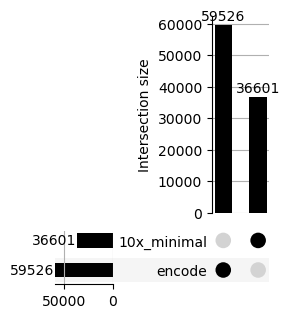

In [16]:
f = pyplot.figure(dpi=100)
_ = upsetplot.plot(upset_gene_contents, fig=f, show_counts=True)

# Transcript ID UpSet Intersection

In [17]:
upset_transcript_contents = upsetplot.from_contents({
    'encode': set([strip_version(x) for x in encode_parser.gtf['transcript_id']]),
    '10x_minimal': set(minimal_parser.gtf['transcript_id']),
})

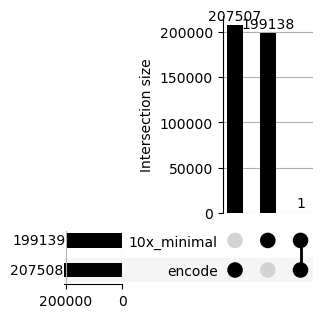

In [18]:
f = pyplot.figure(dpi=100)
_ = upsetplot.plot(upset_transcript_contents, fig=f, show_counts=True)

How many gtf records are there by gene types in the ENCODE gtf file?

In [19]:
encode_types = pandas.Series(Counter(encode_parser.gtf['gene_type'])).sort_values(ascending=False).to_frame(name='count')
encode_types

,count
protein_coding,2503156
lincRNA,61986
antisense,46636
processed_pseudogene,32231
processed_transcript,19045
transcribed_unprocessed_pseudogene,18968
unprocessed_pseudogene,13398
misc_RNA,6666
snRNA,5727
miRNA,5643


How many gtf records are there by gene type in the 10x GTF.

In [22]:
minimal_types = pandas.Series(Counter(minimal_parser.gtf['gene_type'])).sort_values(ascending=False).to_frame(name='count')
minimal_types

,count
protein_coding,2527077
lncRNA,235130
IG_V_gene,1169
TR_V_gene,826
IG_V_pseudogene,664
TR_J_gene,316
IG_C_gene,296
IG_D_gene,152
TR_V_pseudogene,123
IG_J_gene,76


Make sure that the annotations in the full ENCODE set match the annotation names in the 10x set

# Compare gene types present in ENCODE and Cell Ranger indexes

Merge the full and filtered sets and so I can put them in one table

the 10x annotation and the encode annotation disagree on the spelling of lincRNA.

In [57]:
encode_gene_types = pandas.Series(Counter(encode_parser.gtf[encode_parser.gtf["type"] == "gene"]["gene_type"])).to_frame("ENCODE")
encode_gene_types

,ENCODE
transcribed_unprocessed_pseudogene,886
unprocessed_pseudogene,2649
miRNA,1881
lincRNA,7635
protein_coding,19969
processed_pseudogene,10198
antisense,5587
processed_transcript,601
snRNA,1909
transcribed_processed_pseudogene,481


In [58]:
minimal_gene_types = pandas.Series(Counter(minimal_parser.gtf[minimal_parser.gtf["type"] == "gene"]["gene_type"])).to_frame("Cell Ranger ARC")
names = []
for n in minimal_gene_types.index:
    if n == "lncRNA":
        n = "lincRNA"
    names.append(n)
minimal_gene_types.index = names
minimal_gene_types

,Cell Ranger ARC
lincRNA,16562
protein_coding,19394
IG_V_pseudogene,188
IG_V_gene,144
IG_C_gene,14
IG_J_gene,18
TR_C_gene,6
TR_J_gene,79
TR_V_gene,106
TR_V_pseudogene,33


# Full Comparison of ENCODE with Cell Ranger ARC

In [59]:
compare_gene_types = encode_gene_types.merge(minimal_gene_types, left_index=True, right_index=True, how='left').fillna('')
#compare_gene_types.columns = ['ENCODE', 'Cell Ranger ARC']
compare_gene_types.sort_values("ENCODE", ascending=False)

,ENCODE,Cell Ranger ARC
protein_coding,19969,19394
processed_pseudogene,10198,
lincRNA,7635,16562
antisense,5587,
unprocessed_pseudogene,2649,
misc_RNA,2222,
snRNA,1909,
miRNA,1881,
TEC,1060,
snoRNA,943,


In [ ]:
compare_gene_types.to_csv('gene_type_comparison-grch-multiome.csv')

In [ ]:
", ".join(compare_gene_types[compare_gene_types["Cell Ranger"] != ""].index)